In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [29]:
# 데이터 load
data = pd.read_csv('./data/uci-secom.csv')
print(f"data info : {data.info()} \n")
print(f"data null : {data.isnull().sum()} \n")
data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB
data info : None 

data null : Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64 



,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1


In [30]:
# NaN data를 0으로 교체
data = data.replace(np.NaN, 0)

# 결측값 정보를 출력합니다.
data.isnull().sum()

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 592, dtype: int64

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

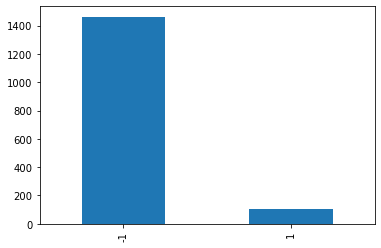

In [10]:
# 막대 그래프로 Pass/Fail 분포 확인
data['Pass/Fail'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인합니다.
data['Pass/Fail'].value_counts()

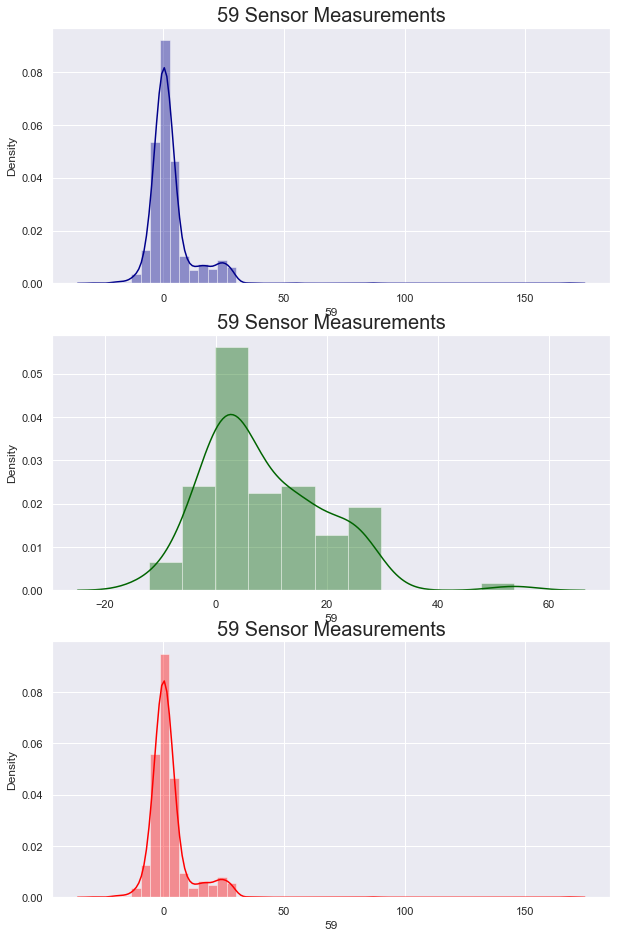

In [15]:
# 59 sensor 를 Pass/Fail 로 나눠서 분포 확인
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (10, 16)

# 전체 59 sensor
plt.subplot(3, 1, 1)
sns.distplot(data['59'], color = 'darkblue')
plt.title('59 Sensor Measurements', fontsize = 20)

# PASS 59 sensor
plt.subplot(3, 1, 2)
sns.distplot(data[data['Pass/Fail']==1]['59'], color = 'darkgreen')
plt.title('59 Sensor Measurements', fontsize = 20)

# FALL 59 sensor
plt.subplot(3, 1, 3)
sns.distplot(data[data['Pass/Fail']==-1]['59'], color = 'red')
plt.title('59 Sensor Measurements', fontsize = 20)
plt.show()

Text(0.5, 1.0, '59 Sensor Measurements')

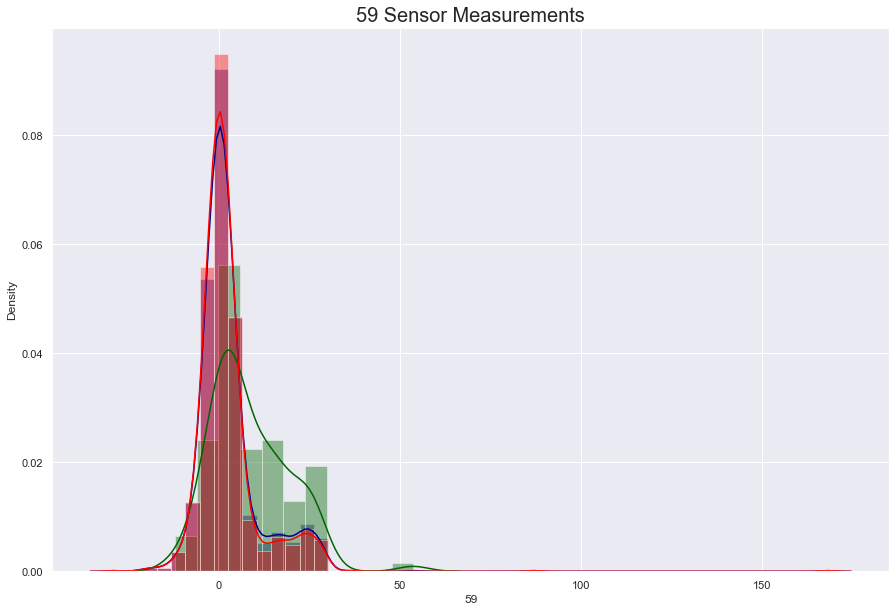

In [16]:
# 59 sensor PASS/FALL overlap plot
plt.rcParams['figure.figsize'] = (15, 10)

# 그래프를 겹쳐서 비교
sns.distplot(data['59'], color = 'darkblue')
sns.distplot(data[data['Pass/Fail']==1]['59'], color = 'darkgreen')
sns.distplot(data[data['Pass/Fail']==-1]['59'], color = 'red')

# 제목과 폰트크기를 정합니다.
plt.title('59 Sensor Measurements', fontsize = 20)

In [ ]:
## target 변수와 상관계수 분석

In [24]:
# 수치형 범주형 나눠주기
def seperate_type(df):
    dtypes = df.dtypes
    numerical = [df.columns[idx] for idx, _ in enumerate(dtypes) if dtypes[idx] != object]
    category = [df.columns[idx] for idx, _ in enumerate(dtypes) if dtypes[idx] == object]
    
    return numerical, category

numerical_feature = seperate_type(data)[0]
category_feature = seperate_type(data)[1]

In [31]:
# 타겟과 수치형과의 상관관계
corr_data = data[numerical_feature].corrwith(data['Pass/Fail']).sort_values(ascending=False)
corr_df = pd.DataFrame(corr_data, columns=['Correlation'])
corr_df

,Correlation
Pass/Fail,1.000000
59,0.156108
103,0.149140
348,0.134289
510,0.131907
...,...
534,NaN
535,NaN
536,NaN
537,NaN


In [45]:
corr_df.iloc[537, :].values[0]

nan

In [55]:
corr_df['Correlation'].isnull()

Pass/Fail    False
59           False
103          False
348          False
510          False
             ...  
534           True
535           True
536           True
537           True
538           True
Name: Correlation, Length: 591, dtype: bool

In [67]:
# NaN으로 나오는 columns들 확인

NaN_col = corr_df.loc[corr_df['Correlation'].isnull()].index.tolist()

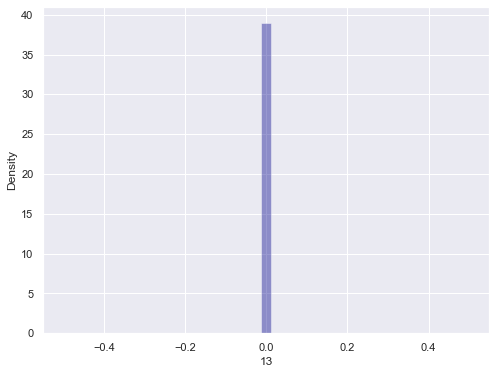

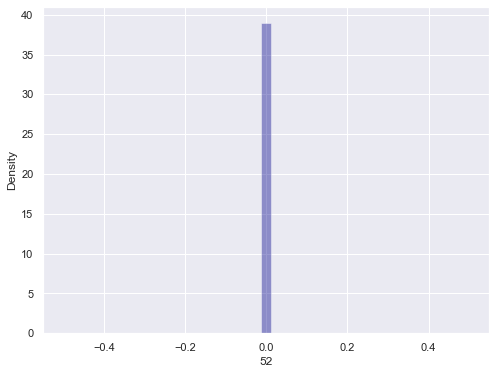

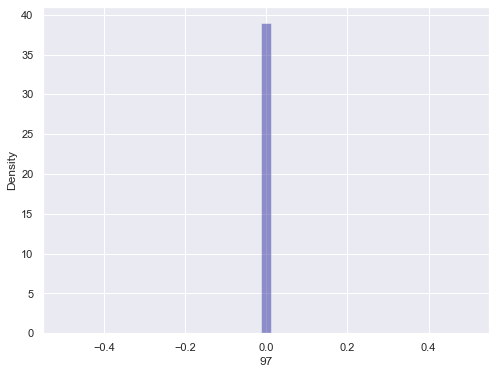

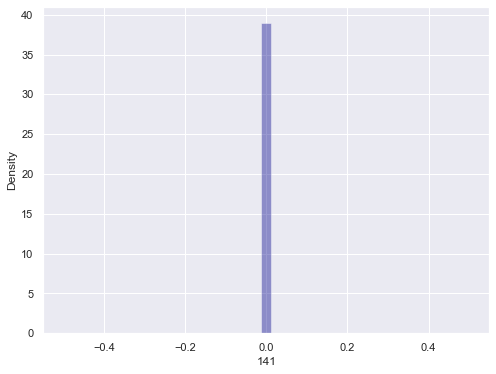

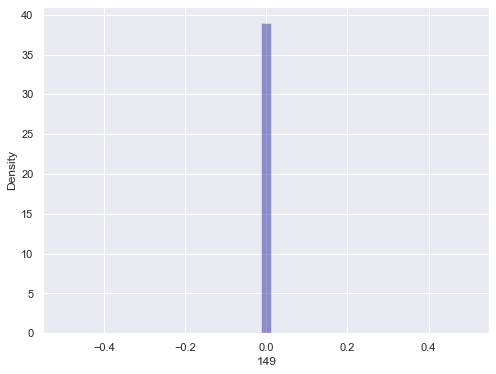

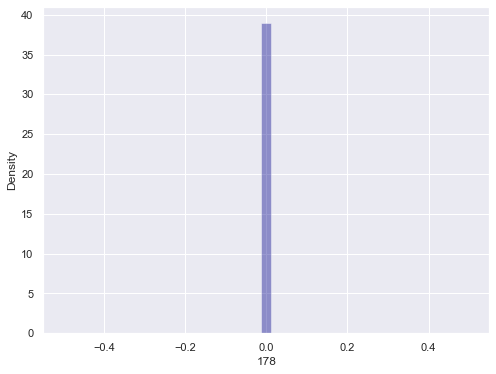

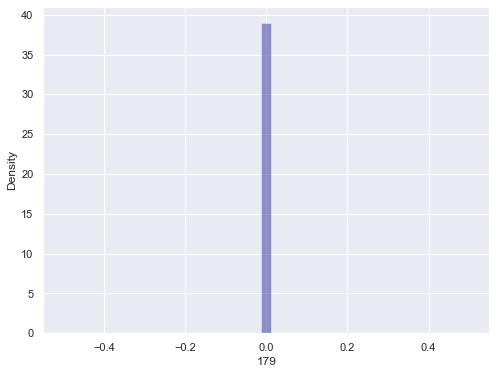

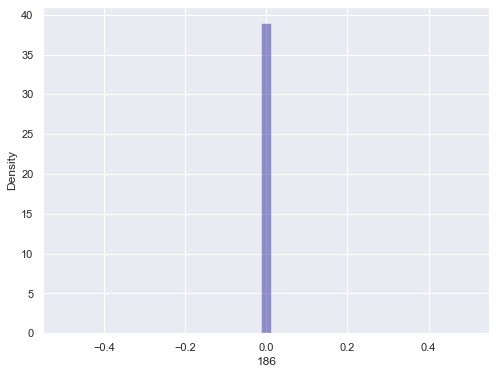

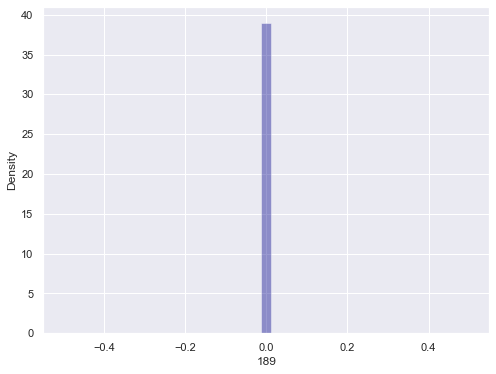

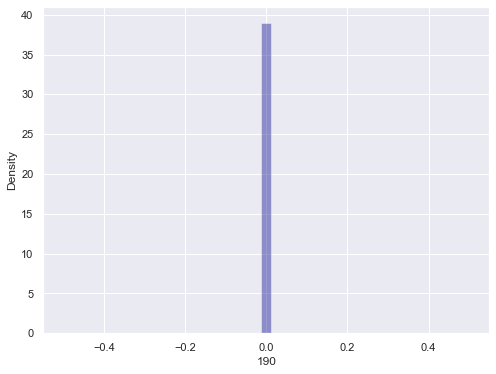

In [68]:
# NaN column 분포 확인

for i in range(10):
    plt.figure(figsize=(8,6))
    sns.distplot(data[NaN_col[i]], color = 'darkblue')
    plt.show()

In [81]:
# 0만 있는 분포 제거
data.drop(NaN_col, axis=1, inplace=True)

In [86]:
numerical_feature[-1]

'Pass/Fail'

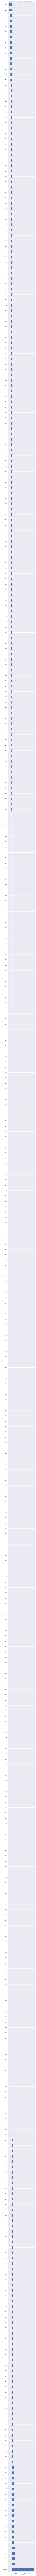

In [93]:
plt.figure(figsize=(5,len(numerical_feature)))
[numerical_feature.remove(col) for col in NaN_col]
data[numerical_feature].corrwith(data['Pass/Fail']).sort_values(ascending=False).plot(kind='barh') 
plt.title('Correlation Pass/Fail and other numerical datas')
plt.ylabel('Column name')
plt.xlabel('Correlation')
plt.show()

<AxesSubplot:>

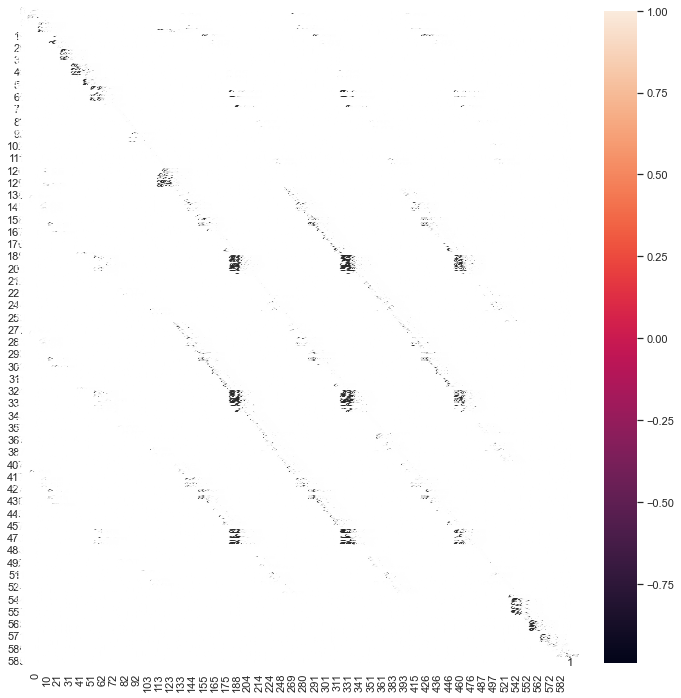

In [96]:
plt.figure(figsize=(12, 12))

tmp = data[numerical_feature].corr()
sns.heatmap(tmp, annot=True)
plt.show()